In [4]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from dotenv import dotenv_values
from dotenv import load_dotenv
import sql_functions as sf
from sql_functions import get_sql_config, get_data, get_dataframe, get_engine

### 1. Star ratings


#### 1.1 Overview of star rating distribution 

In [5]:
#### create a df of business in PA from DB
schema = 'hh_analytics_23_3'
restaurants = sf.get_dataframe('SELECT * FROM hh_analytics_23_3.yelp_business_pa') 

In [6]:
# Group by stars 
ratings = restaurants.groupby(by='stars').count()
ratings = ratings.reset_index()
ratings = ratings[['stars', 'business_id']]

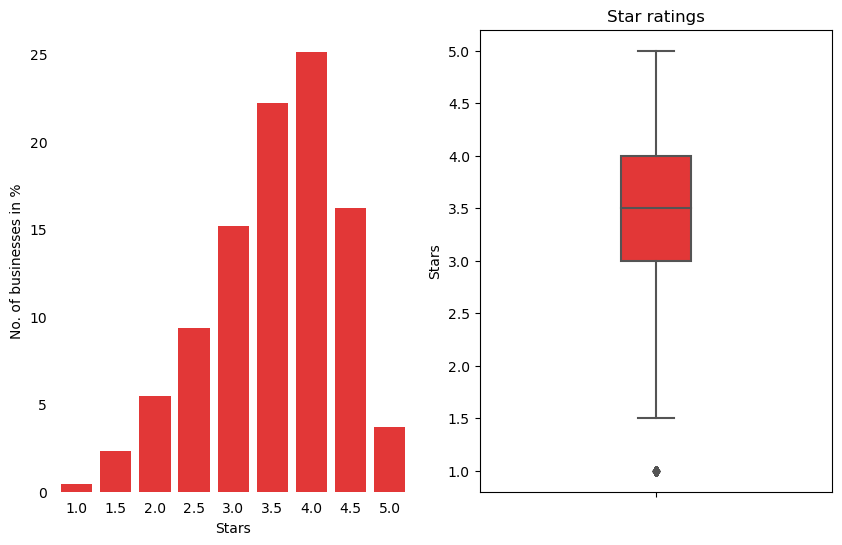

In [7]:
# Plot star rating distribution

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
# fig.suptitle('Customer ratings', fontsize=16)
sns.barplot(ax = ax[0], x=ratings['stars'], y=ratings['business_id']*100/ratings['business_id'].sum(), color='#FF1A1A')
ax[0].set(xlabel='Stars', ylabel='No. of businesses in %')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].tick_params(left = False)
ax[0].tick_params(bottom = False)
sns.boxplot(ax = ax[1], y=restaurants['stars'], width=0.2, color='#FF1A1A')
ax[1].set(ylabel='Stars')
ax[1].set_title('Star ratings');

#### 1.2 Co relation between attributes and star rating

### 2. Sentiment analysis of reviews of 3.5 biz 
We filtered all the business in PA with 3.5 stars rating as our target group, then we combined with review table, after we did sentiment analysis of it. 
We got 281,695 reviews in total. 

In [8]:
# read the file of sentiment analysis of all the 3.5 biz in Pa
sentiment_target = pd.read_csv('data/sentiment_target.csv')
sentiment_target.shape

(281695, 27)

In [ ]:
sentiment_target

#### 2.1 Sentiment distribution

We visualized a distribution plot to see the stats of the positive, neutral, and negative reviews. 


Around 175,000 postive reviews, and more than 600,000 negative reviews.
Even the businesses in the range of 3.5, in total, the positive reviews are still 2 times more than the negative ones.
Have potential to improve

<Axes: xlabel='result', ylabel='count'>

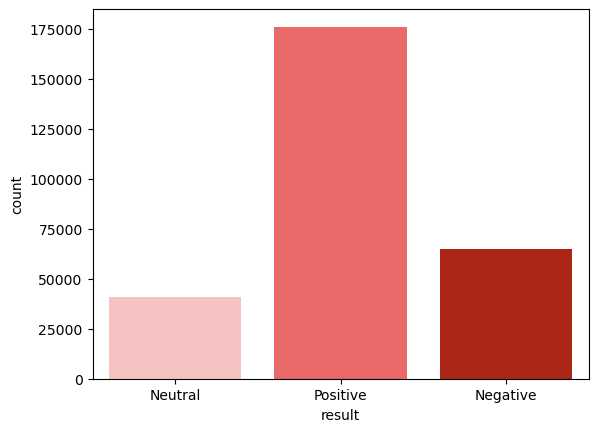

In [10]:
color = ["#ffbaba", "#ff5252", "#C41200"]
sns.countplot(x='result', data=sentiment_target, palette=color)

#### 2.2 Co relations between star rating and sentiment analysis result

#### 2.3 Details of postive and negative reviews 
Observations: 
In average, a business has 18 negative reviews and 50 positive reviews, positive ones in 3 times more than negatives. 
75% of business have less than 22 negative reviews.

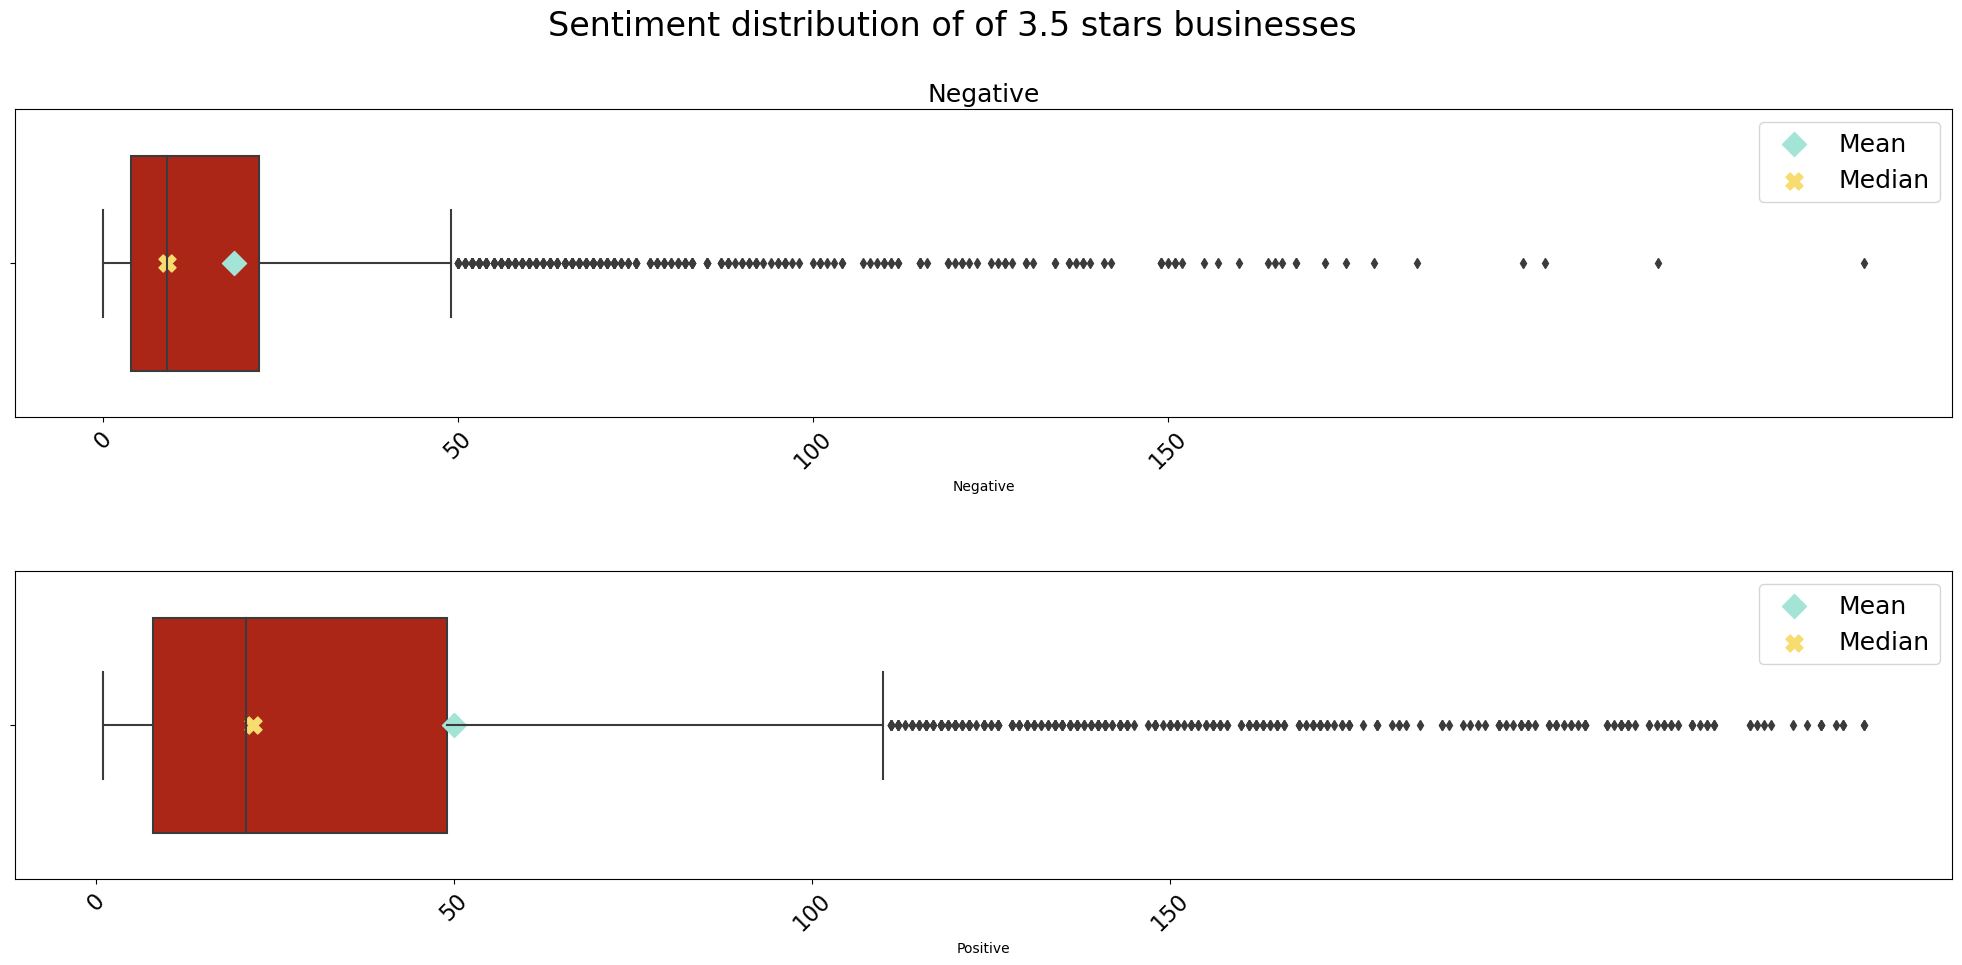

In [11]:
# create a new df to storage sentiment analysis result by each biz
sentiment_counts = sentiment_target.groupby('business_id')['result'].value_counts().unstack(fill_value=0)

# limited the sample group to show in the boxplot, for display reason
sentiment_counts_n = sentiment_counts[sentiment_counts["Negative"] < 250]
sentiment_counts_p = sentiment_counts[sentiment_counts["Positive"] < 250]

plt.figure(figsize=(25, 10))

# set the gap btw 2 plots
plt.subplots_adjust(hspace=0.5)

plt.suptitle('Sentiment distribution of of 3.5 stars businesses', fontsize=24)

# negative subplot
plt.subplot(2, 1, 1)
sns.boxplot(x=sentiment_counts_n['Negative'], color='#c41200', width = 0.7)
# to calculate the mean and medium
means_n = sentiment_counts["Negative"].mean()
medians_n = sentiment_counts["Negative"].median()
# to show the mean and median with different makers in the plot, and defined the size of the makers
plt.scatter(y=[0], x=[means_n], color='#A3E4D7', marker='D', label='Mean', s=150)
plt.scatter(y=[0], x=[medians_n], color='#F7DC6F', marker='X', label='Median', s=150)
# set up the X axis
plt.xticks(np.arange(0, 200, step=50), fontsize = 16, rotation=45)
plt.title('Negative', fontsize = 18)
plt.legend(fontsize = 18)

# positive subplot
plt.subplot(2, 1, 2)
sns.boxplot(x=sentiment_counts_p["Positive"], color='#c41200', width = 0.7)
means_p = sentiment_counts["Positive"].mean()
medians_p = sentiment_counts["Positive"].median()
plt.scatter(y=[0], x=[means_p], color='#A3E4D7', marker='D', label='Mean', s=150)
plt.scatter(y=[0], x=[medians_p], color='#F7DC6F', marker='X', label='Median', s=150)
plt.xticks(np.arange(0, 200, step=50), fontsize = 16, rotation=45)
plt.legend(fontsize = 18)

In [12]:
sentiment_counts.describe()

result,Negative,Neutral,Positive
count,3516.000000,3516.000000,3516.000000
mean,18.460182,11.589022,50.068828
std,27.662287,22.249364,84.957182
min,0.000000,0.000000,1.000000
25%,4.000000,2.000000,9.000000
50%,9.000000,4.000000,22.000000
75%,22.000000,12.000000,54.000000
max,520.000000,438.000000,1785.000000
